### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [4]:
data = pd.read_csv("../dataset/Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [6]:

# Función para etiquetar el perfil según el valor de GPA
def assign_profile(gpa):
    if 0 <= gpa < 2:
        return 'Low'
    elif 2 <= gpa <= 3.5:
        return 'Medium'
    elif 3.5 < gpa <= 5:
        return 'High'
    else:
        return 'Unknown'  # Por si acaso hay un valor fuera del rango esperado

# Añadir la nueva columna 'Profile' utilizando la función definida
data['Profile'] = data['GPA'].apply(assign_profile)

# Verificar las primeras filas para confirmar el resultado
print(data.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass Profile  
0             0  2.929196         2.0  Medium  
1 

### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

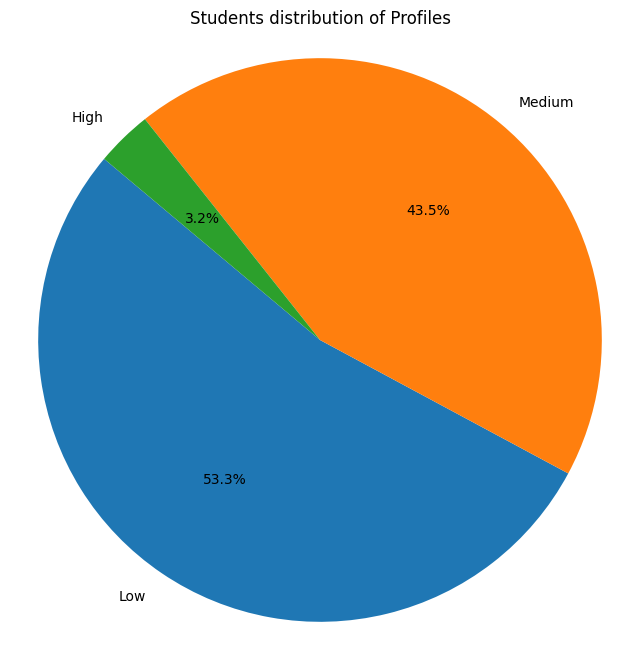

In [7]:

# Contar el número de estudiantes en cada perfil
profile_counts = data['Profile'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Students distribution of Profiles')
plt.axis('equal')  # Asegura que el gráfico sea circular

# Mostrar el gráfico
plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [10]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el encoder a los valores de 'Profile' y transformar la columna
data['Profile'] = label_encoder.fit_transform(data['Profile'])

# Verificar las primeras filas para confirmar el resultado
print(data[['GPA', 'Profile']].head())

        GPA  Profile
0  2.929196        2
1  3.042915        2
2  0.112602        1
3  2.054218        2
4  1.288061        1


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [15]:

# Crear el dataset de características (excluyendo 'Profile') y el dataset de etiqueta ('Profile')
X = data.drop(columns=['Profile', 'GPA', 'StudentID', 'GradeClass'])  # Todas las columnas excepto 'Profile'
y = data['Profile']  # Solo la columna 'Profile'

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar información sobre los tamaños de los datasets resultantes
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")



Tamaño de X_train: (1913, 12)
Tamaño de X_test: (479, 12)
Tamaño de y_train: (1913,)
Tamaño de y_test: (479,)


### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [16]:

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el StandardScaler al conjunto de entrenamiento y transformar tanto el entrenamiento como la prueba
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verificar los datos estandarizados
print("Primeras 5 filas de X_train estandarizado:")
print(X_train[:5])

Primeras 5 filas de X_train estandarizado:
[[ 1.37285117  0.97165101 -0.84616672  2.26211643  1.46815853  1.10591545
   1.51976596 -1.9146563   1.27724773  1.51039849 -0.49705784 -0.43041146]
 [-0.40585814  0.97165101  2.06170801  0.23853507 -1.27677348  0.51650879
  -0.65799605 -1.02021491 -0.78293347 -0.66207693 -0.49705784  2.3233582 ]
 [ 0.48349652 -1.0291761   1.09241643  1.25032575 -1.10363153  1.22379678
  -0.65799605 -1.9146563  -0.78293347 -0.66207693 -0.49705784 -0.43041146]
 [ 0.48349652  0.97165101 -0.84616672 -0.77325561  1.06811657  1.22379678
   1.51976596 -0.12577352 -0.78293347 -0.66207693 -0.49705784 -0.43041146]
 [-0.40585814 -1.0291761  -0.84616672 -1.78504629 -1.52652437  0.51650879
   1.51976596 -0.12577352 -0.78293347 -0.66207693  2.01183831 -0.43041146]]


### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [17]:

# Definir el número de clases de salida (basado en los valores únicos en y_train)
num_classes = len(y_train.unique())

# Crear el modelo secuencial
model = Sequential()

# Añadir la capa de entrada con 64 unidades y función de activación ReLU
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Añadir una capa oculta con 32 unidades y activación ReLU
model.add(Dense(32, activation='relu'))

# Añadir la capa de salida con tantas unidades como clases (usando activación softmax)
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()

/Users/jacobohirsch/Documents/tec de monterrey/Septimo semestre 2024 /Inteligencia artificial avanzada /periodo dos y tres /Deep learning /deep_learning/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,011 (11.76 KB)

 Trainable params: 3,011 (11.76 KB)

 Non-trainable params: 0 (0.00 B)

### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [18]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [19]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.5725 - loss: 0.8548 - val_accuracy: 0.8877 - val_loss: 0.3486
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9119 - loss: 0.2966 - val_accuracy: 0.9086 - val_loss: 0.2558
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9167 - loss: 0.2370 - val_accuracy: 0.9008 - val_loss: 0.2245
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.9277 - loss: 0.1881 - val_accuracy: 0.9295 - val_loss: 0.2015
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9314 - loss: 0.1740 - val_accuracy: 0.9243 - val_loss: 0.2033
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9373 - loss: 0.1721 - val_accuracy: 0.9321 - val_loss: 0.1905
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9303 - loss: 0.1776 - val_accuracy: 0.9138 - val_loss: 0.2031
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9322 - loss: 0.1663 - 

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

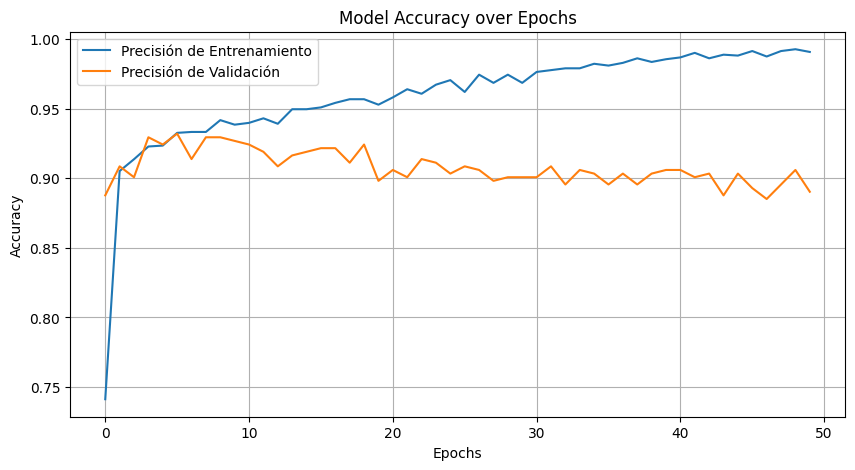

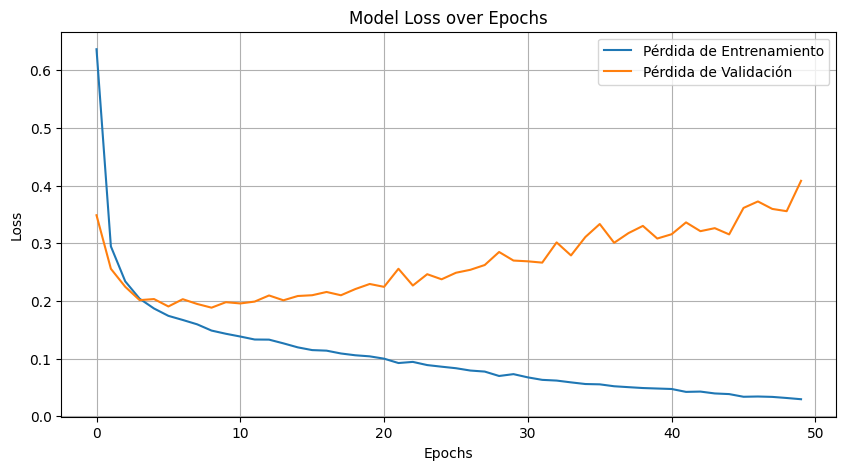

In [20]:

# Gráfica de Precisión del Modelo (Entrenamiento y Validación)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de Pérdida del Modelo (Entrenamiento y Validación)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [21]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)

# Mostrar los resultados
print(f"Loss en el conjunto de prueba: {loss}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8875 - loss: 0.6305
Loss en el conjunto de prueba: 0.5213907957077026
Accuracy en el conjunto de prueba: 0.893528163433075


### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [22]:

# Hacer predicciones con el modelo sobre el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertir las probabilidades predichas al valor con mayor probabilidad (clase predicha)
y_pred = np.argmax(y_pred_prob, axis=1)

# Recuperar los valores categóricos originales ('Low', 'Medium', 'High')
# Primero, necesitamos saber qué valor corresponde a qué clase, con base en el LabelEncoder
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Invertir el mapeo para obtener de nuevo los nombres de las clases
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Convertir los valores numéricos a sus correspondientes etiquetas categóricas
y_pred_labels = [inverse_class_mapping[pred] for pred in y_pred]
y_test_labels = [inverse_class_mapping[true] for true in y_test]

# Mostrar las predicciones y los valores reales para algunos ejemplos
print("Predicción vs Valor Real")
for i in range(10):  # Mostrar las primeras 10 predicciones
    print(f"Predicción: {y_pred_labels[i]}, Valor Real: {y_test_labels[i]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicción vs Valor Real
Predicción: 1, Valor Real: 1
Predicción: 2, Valor Real: 2
Predicción: 1, Valor Real: 2
Predicción: 0, Valor Real: 0
Predicción: 1, Valor Real: 1
Predicción: 2, Valor Real: 2
Predicción: 1, Valor Real: 2
Predicción: 2, Valor Real: 2
Predicción: 2, Valor Real: 2
Predicción: 1, Valor Real: 1


### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [23]:

# Definir el modelo secuencial (Modelo 2)
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dropout(0.3))  # Añadir Dropout para evitar el sobreajuste
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_2.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100


/Users/jacobohirsch/Documents/tec de monterrey/Septimo semestre 2024 /Inteligencia artificial avanzada /periodo dos y tres /Deep learning /deep_learning/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6873 - loss: 0.7391 - val_accuracy: 0.9269 - val_loss: 0.3249
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8599 - loss: 0.3820 - val_accuracy: 0.9217 - val_loss: 0.2462
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.9020 - loss: 0.2784 - val_accuracy: 0.8982 - val_loss: 0.2619
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8938 - loss: 0.2790 - val_accuracy: 0.9191 - val_loss: 0.2079
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8874 - loss: 0.2669 - val_accuracy: 0.9295 - val_loss: 0.1948
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8927 - loss: 0.2681 - val_accuracy: 0.9243 - val_loss: 0.1878
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.9216 - loss: 0.2206 - val_accuracy: 0.9138 - val_loss: 0.2062
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.8987 - loss: 0.2293 - val_accuracy: 0.8956 -

#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [24]:

# Definir el modelo secuencial (Modelo 3)
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]))
model_3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_3.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model_3.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_3.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_3 = model_3.fit(X_train, y_train, epochs=80, batch_size=20, validation_split=0.2)

Epoch 1/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2972 - loss: 1.9530 - val_accuracy: 0.4230 - val_loss: 1.9165
Epoch 2/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.3972 - loss: 1.9116 - val_accuracy: 0.4961 - val_loss: 1.8826
Epoch 3/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.4831 - loss: 1.8821 - val_accuracy: 0.5483 - val_loss: 1.8502
Epoch 4/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5394 - loss: 1.8461 - val_accuracy: 0.5849 - val_loss: 1.8166
Epoch 5/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.6134 - loss: 1.8037 - val_accuracy: 0.6136 - val_loss: 1.7834
Epoch 6/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.6375 - loss: 1.7630 - val_accuracy: 0.6423 - val_loss: 1.7510
Epoch 7/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6741 - loss: 1.7313 - val_accuracy: 0.6449 - val_loss: 1.7195
Epoch 8/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.6861 - loss: 1.6935 - val_accuracy: 0.66

Tabla de resultados 

In [26]:
# Evaluar los tres modelos en el conjunto de prueba
loss_1, accuracy_1 = model.evaluate(X_test, y_test, verbose=0)
loss_2, accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)
loss_3, accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)

# Crear un DataFrame con los resultados de los tres modelos
results = {
    'Model': ['Original', 'Model 2 (Dropout y más capas)', 'Model 3 (Regularización L2)'],
    'Loss': [loss_1, loss_2, loss_3],
    'Accuracy': [accuracy_1, accuracy_2, accuracy_3]
}

results_df = pd.DataFrame(results)

# Mostrar la tabla con los resultados
print("Tabla de Resultados de los Modelos:")
print(results_df)


Tabla de Resultados de los Modelos:
                           Model      Loss  Accuracy
0                       Original  0.521391  0.893528
1  Model 2 (Dropout y más capas)  0.504306  0.891441
2    Model 3 (Regularización L2)  0.946737  0.891441


Predicción para 5 alumnos 

In [27]:
# Hacer predicciones para los primeros 5 alumnos del conjunto de prueba
y_pred_prob = model.predict(X_test[:5])
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir las probabilidades a clases predichas

# Recuperar los valores categóricos originales ('Low', 'Medium', 'High')
y_pred_labels = [inverse_class_mapping[pred] for pred in y_pred]
y_test_labels = [inverse_class_mapping[true] for true in y_test[:5]]

# Crear un DataFrame con los valores reales y las predicciones para los primeros 5 alumnos
predictions = {
    'Student': [f'Student {i+1}' for i in range(5)],
    'Actual Profile': y_test_labels,
    'Predicted Profile': y_pred_labels
}

predictions_df = pd.DataFrame(predictions)

# Mostrar la tabla de predicciones
print("\nTabla de Predicciones para 5 Alumnos del Conjunto de Prueba:")
print(predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Tabla de Predicciones para 5 Alumnos del Conjunto de Prueba:
     Student  Actual Profile  Predicted Profile
0  Student 1               1                  1
1  Student 2               2                  2
2  Student 3               2                  1
3  Student 4               0                  0
4  Student 5               1                  1
